# 문제 1
- 단지번호붙이기
- https://www.acmicpc.net/problem/2667

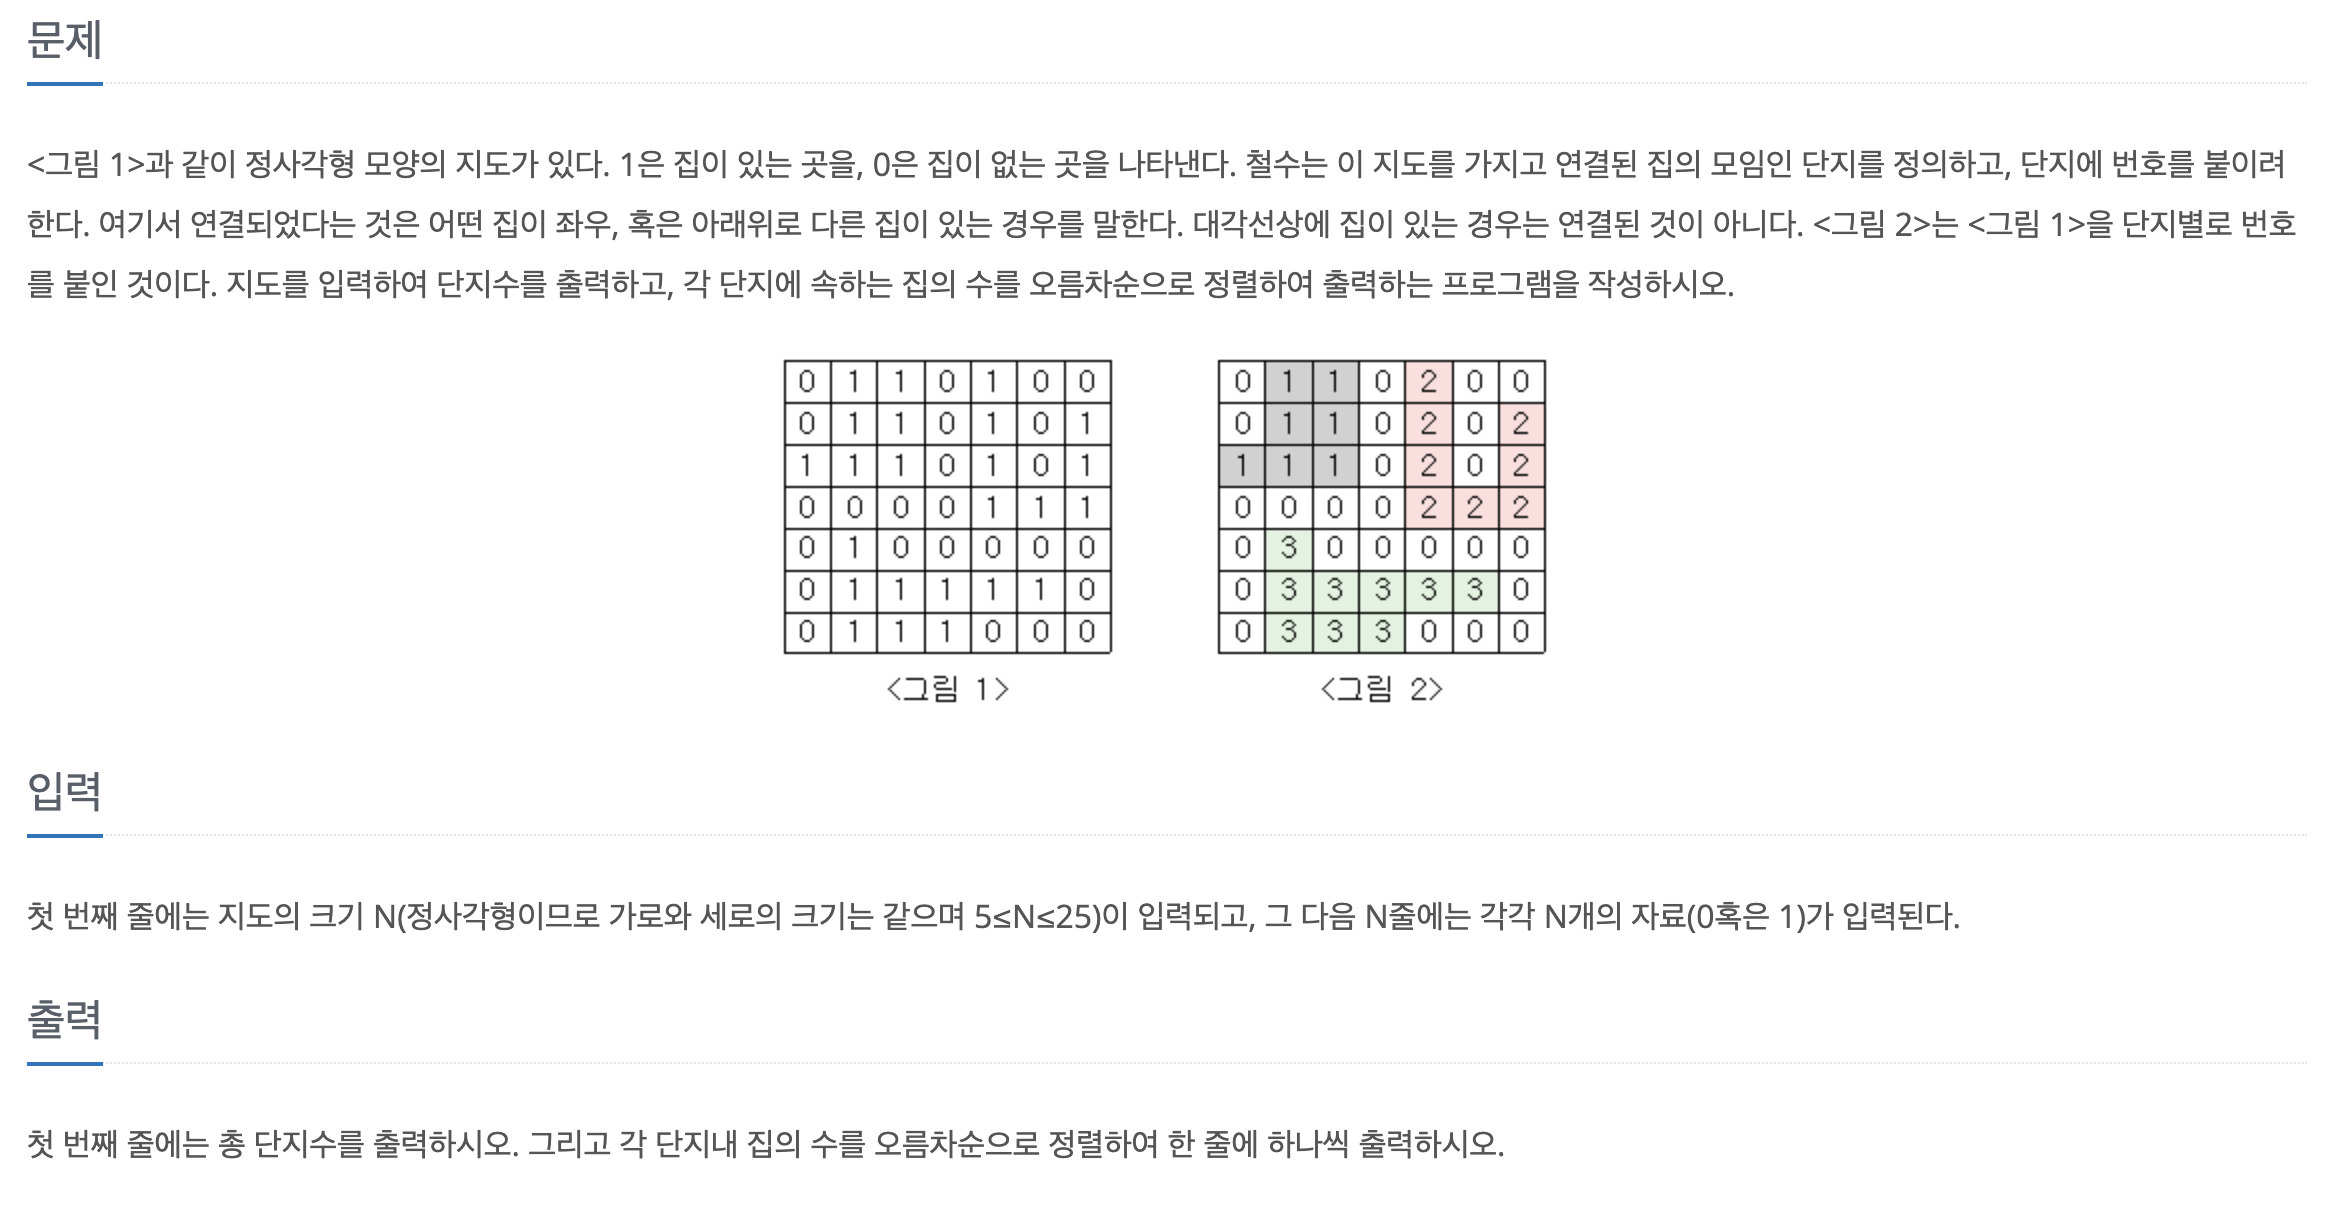
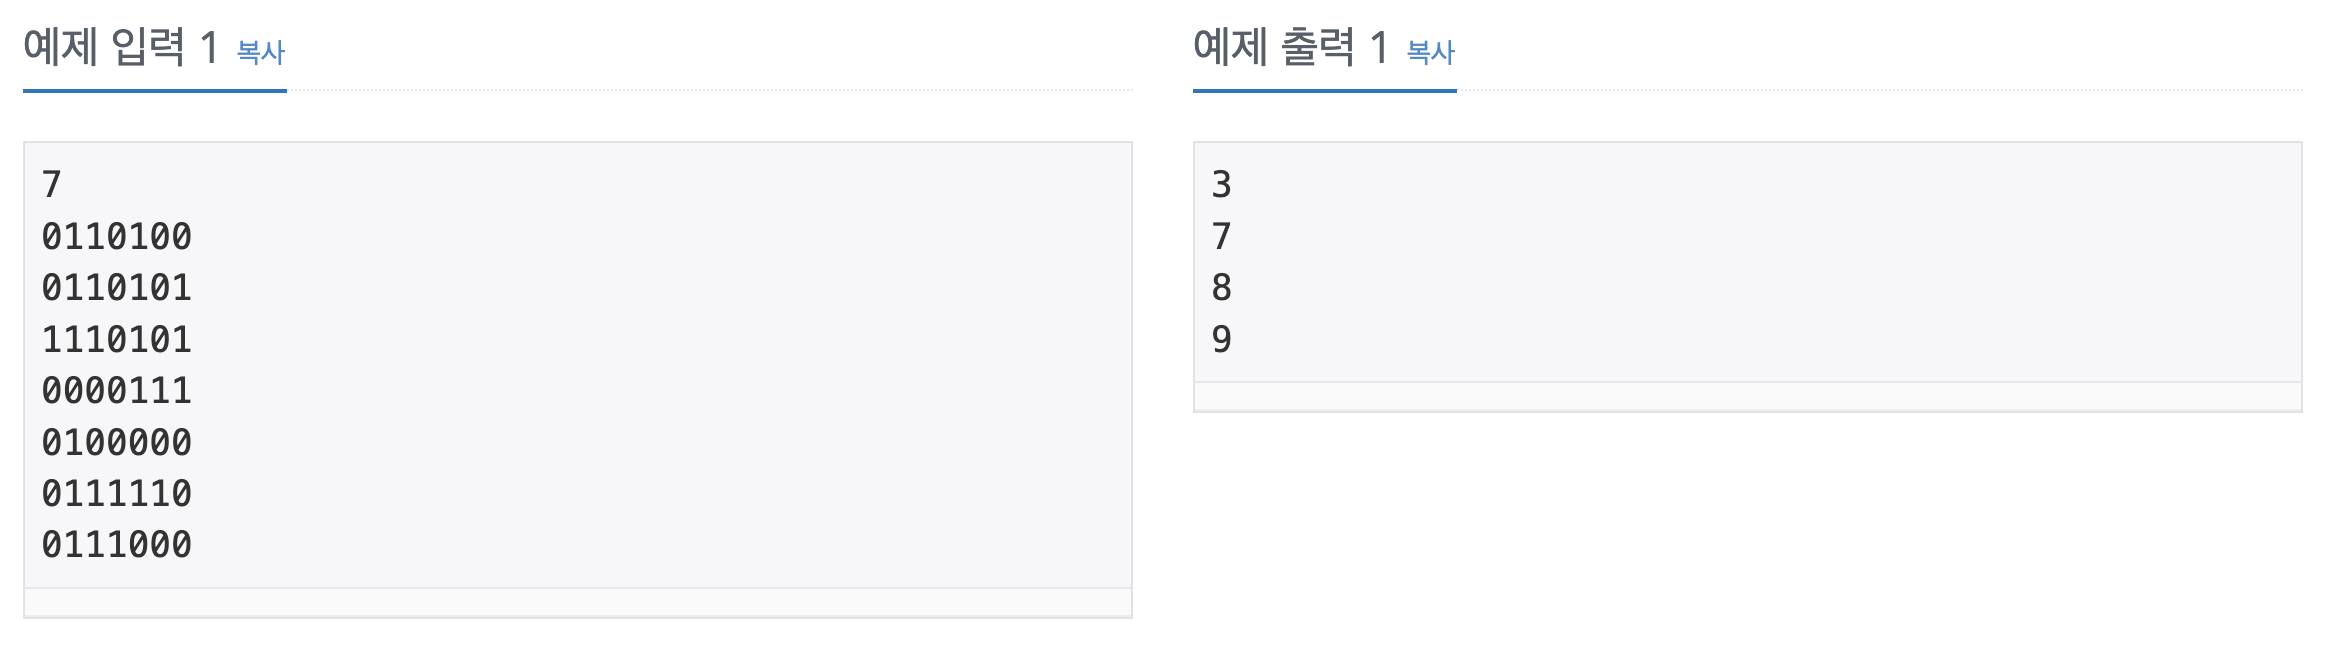

## Step
- dfs 재귀 이용
- 영역 넓힐 때 마다 넓이 변수 cnt +1
- 한 번 탐색 마무리 하면, cnt 값을 정답 리스트에 넣어줌
- 정답리스트의 길이 출력, 정렬해서 오름차순 순으로 출력

In [45]:
n = int(input())
house = [[] for _ in range(n)]
for i in range(n):
    each = input()
    for h in each:
        house[i].append(int(h))
        
dx = [-1,0,1,0]
dy = [0,1,0,-1]
cnt = 0
def dfs(x,y):
    global cnt
    if house[x][y] == 1:
        house[x][y] = 2
        cnt += 1
        
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]

            if 0 <= nx < n and 0 <= ny < n:
                if house[nx][ny] == 1:
                    dfs(nx,ny)
                    
ans = []
for i in range(n):
    for j in range(n):
        cnt = 0
        dfs(i,j)
        if cnt != 0:
            ans.append(cnt)
ans.sort()

print(len(ans))
for each in ans:
    print(each)

3
110
100
001
2
1
3


# 문제 2
- 토마토
- https://www.acmicpc.net/problem/7569

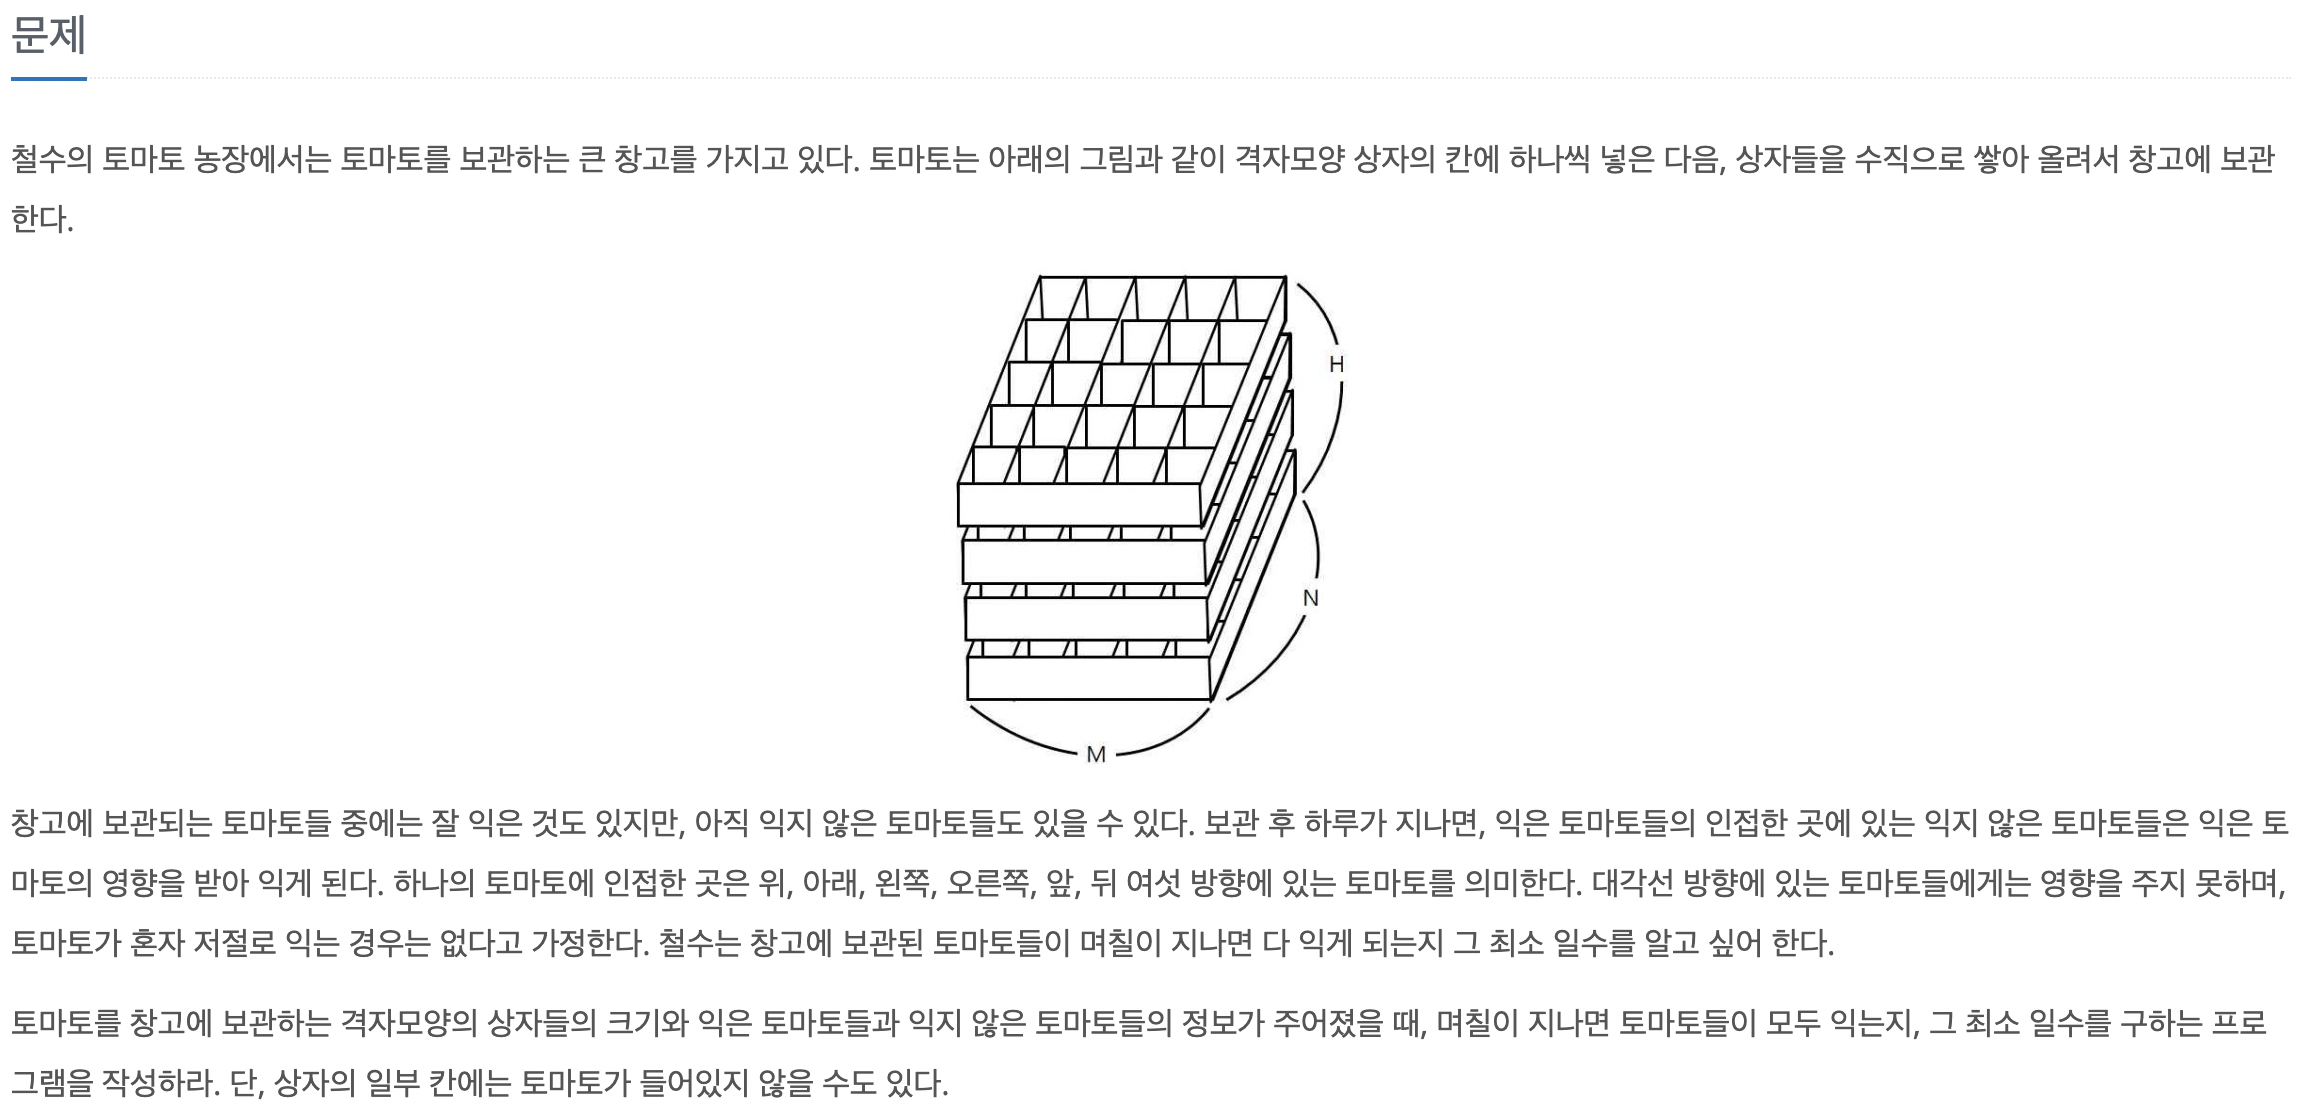
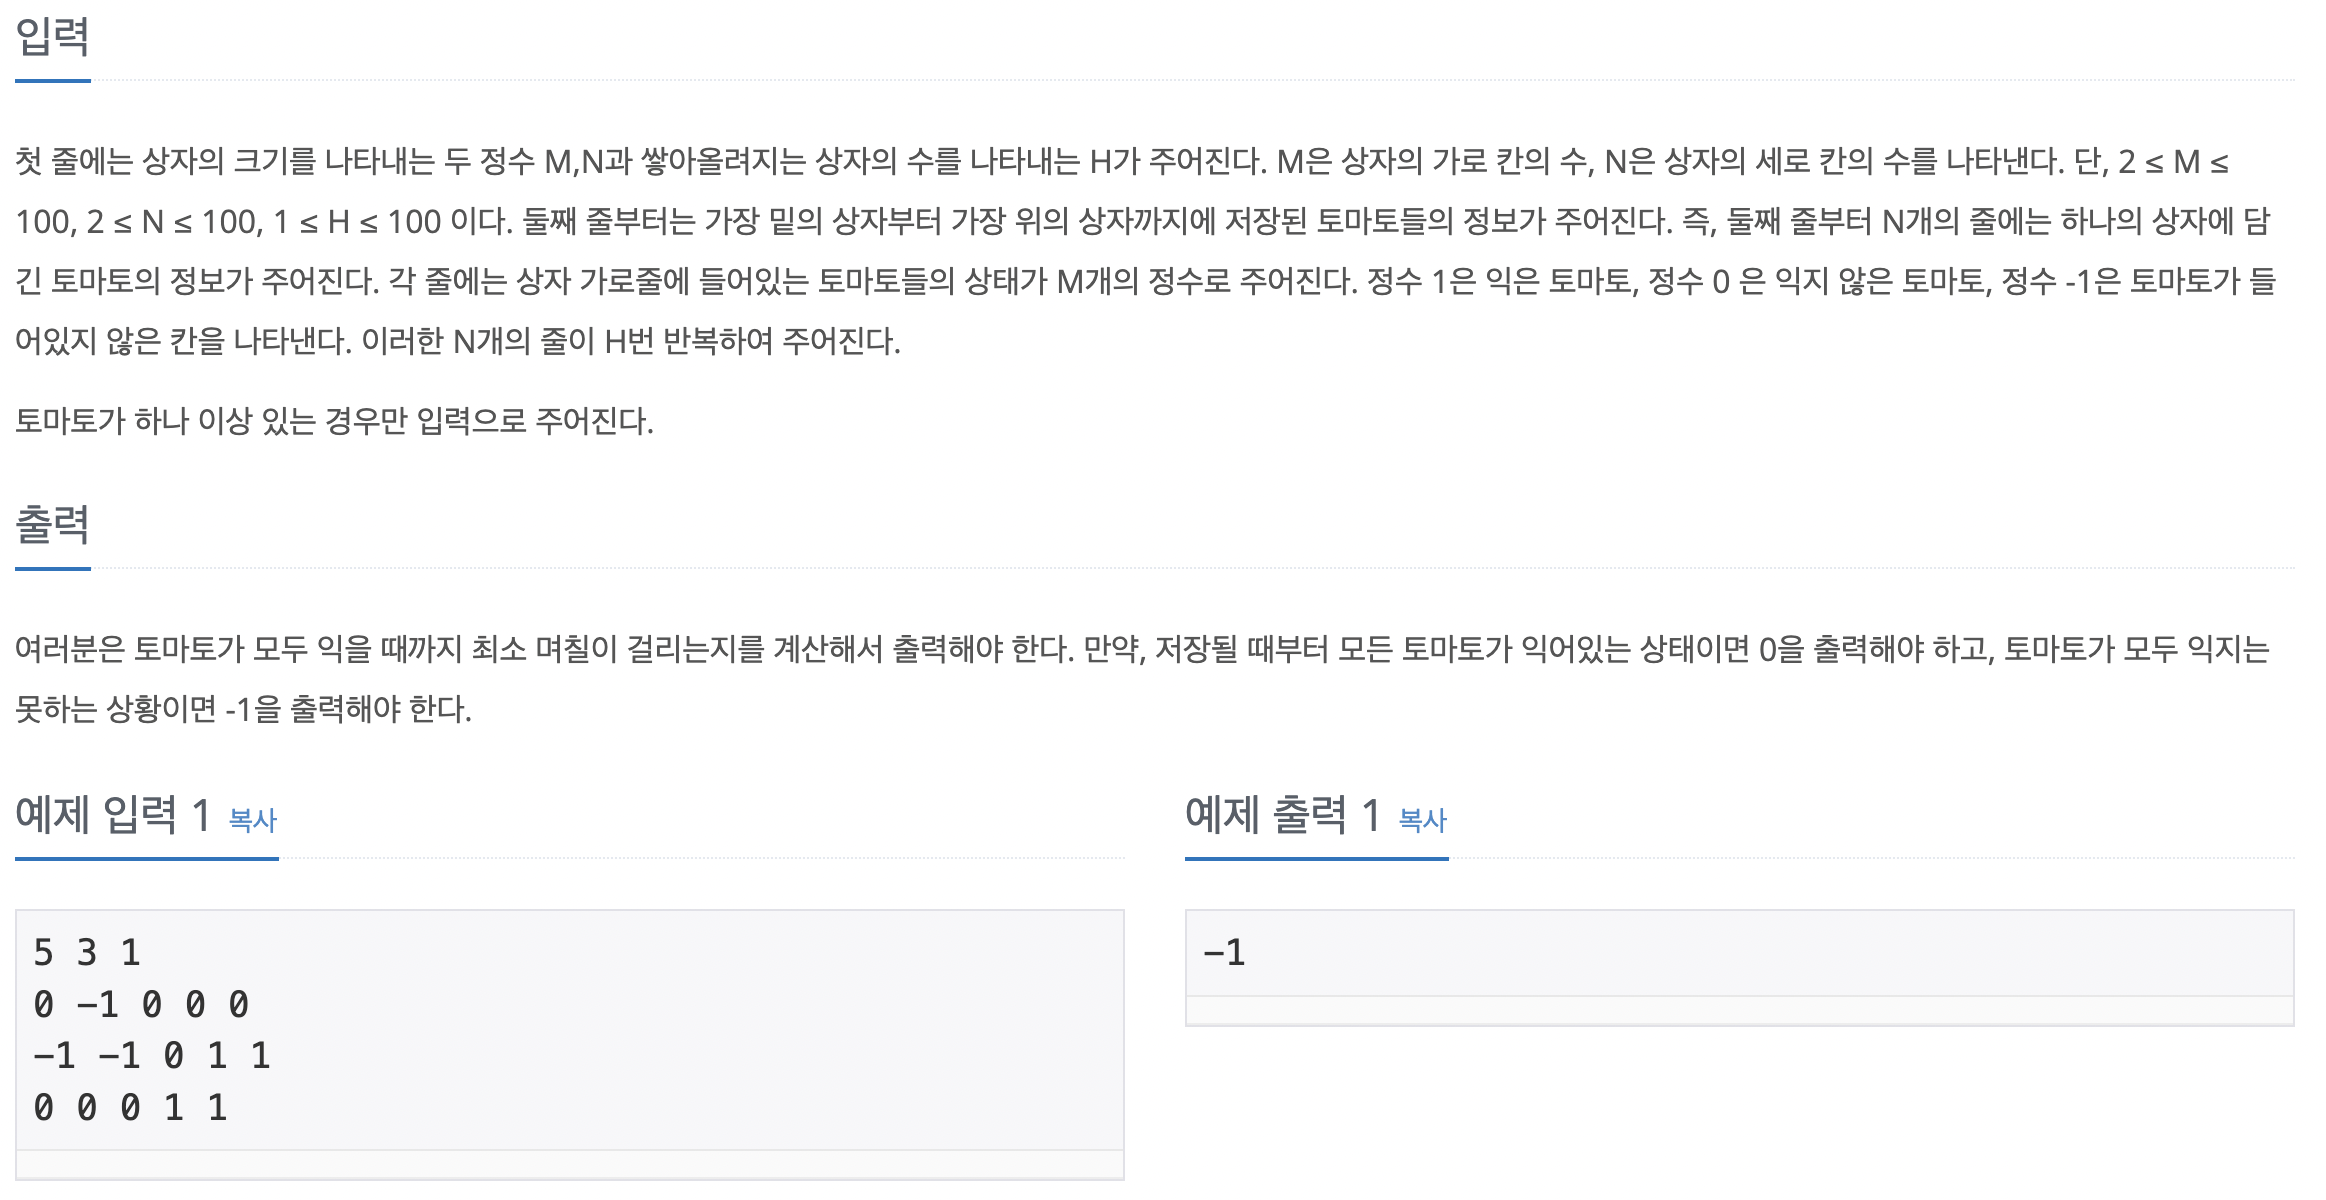
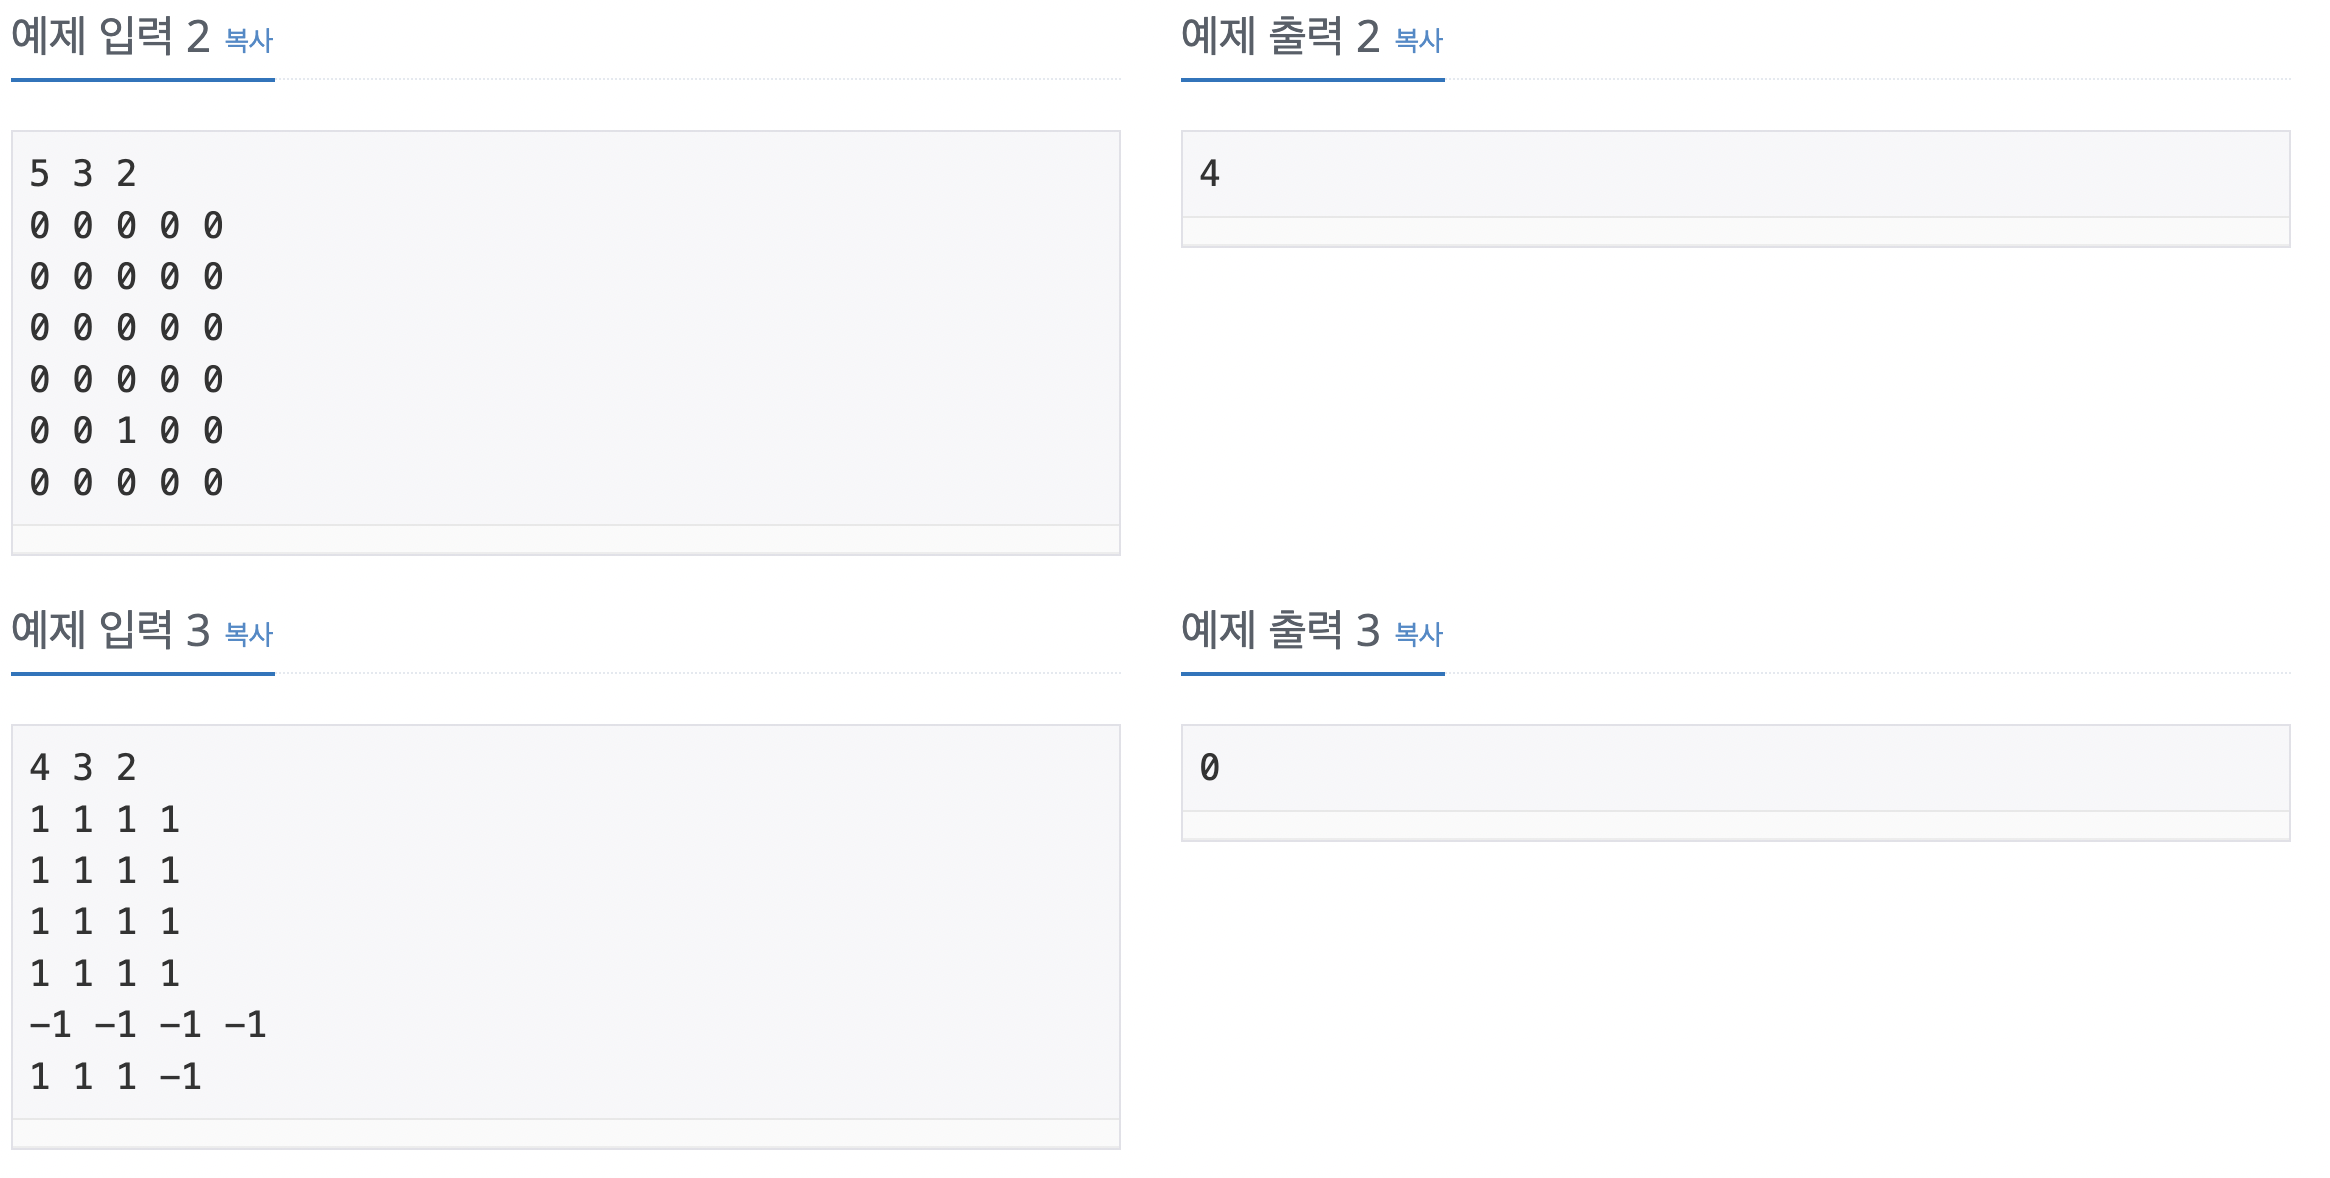

## 시행착오 과정
- bfs 함수 안에서 deque에 좌표를 추가하고, 좌표를 순회하며 bfs를 돌렸더니 앞 좌표부터 bfs를 수행해버림
- 따라서 bfs함수를 돌리기 전, 모든 좌표를 순회하며 토마토가 있는 곳의 좌표를 deque에 추가를 해 놓은 상태에서 bfs함수 수행하여 해결

## 제출 코드

In [203]:
from collections import deque

m,n,h = map(int,input().split())
tomato = [[[] for _ in range(n)] for _ in range(h)]
for i in range(h):
    for j in range(n):
        tomato[i][j].extend(list(map(int, input().split())))
        
dx = [-1,0,1,0,0,0]
dy = [0,1,0,-1,0,0]
dz = [0,0,0,0,1,-1]

q = deque()
for z in range(h):
    for x in range(n):
        for y in range(m):
            if tomato[z][x][y] == 1:
                q.append((z,x,y))

def bfs():
    while q:
        z,x,y = q.popleft()
        for i in range(6):
            nx = x + dx[i]
            ny = y + dy[i]
            nz = z + dz[i]

            if 0 <= nx < n and 0 <= ny < m and 0 <= nz < h:
                if tomato[nz][nx][ny] == 0:
                    tomato[nz][nx][ny] = tomato[z][x][y] + 1
                    q.append((nz,nx,ny))
                    #print(tomato)

bfs()

flag = 0
result = -2
for i in range(h):
    for j in range(n):
        for k in range(m):
            if tomato[i][j][k] == 0:
                flag = 1
            result = max(result,tomato[i][j][k])
            
if flag == 1:
    print(-1)
elif result == -1:
    print(0)
else:
    print(result-1)

5 3 1
1 0 0 1 0
0 0 0 0 0
0 0 1 0 0
2


## 참고코드
- https://resilient-923.tistory.com/263

In [ ]:
import sys
from collections import deque
input = sys.stdin.readline

m,n,h = map(int,input().split())


dx = [-1,1,0,0,0,0]
dy = [0,0,-1,1,0,0]
dz = [0,0,0,0,-1,1]

data = [[list(map(int, input().split())) for _ in range(n)] for _ in range(h)]
queue = deque()

#3차원 bfs문제
def bfs():
    while queue:
        # 높이, x,y 순서
        z,x,y = queue.popleft()
        for i in range(6):
            nx = x + dx[i]
            ny = y + dy[i]
            nz = z + dz[i]
            if -1<nx<n and -1<ny<m and -1<nz<h:
                # 높이, x,y 순서
                if data[nz][nx][ny] == 0:
                    data[nz][nx][ny] = data[z][x][y]+1
                    queue.append((nz,nx,ny))
            
for i in range(h):
    for j in range(n):
        for k in range(m):
            # 높이, x,y 순서
            if data[i][j][k] == 1:
                # 높이, x,y 순서
                queue.append((i,j,k))
bfs()
flag = 0
result = -2
for i in range(h):
    for j in range(n):
        for k in range(m):
            # 높이, x,y 순서
            if data[i][j][k] == 0:
                flag = 1
                # 높이, x,y 순서
            result = max(result,data[i][j][k])
if flag == 1:
    print(-1)
elif result == -1:
    print(0)
else:
    print(result-1)

# 문제 3
- 빙산
- https://www.acmicpc.net/problem/2573

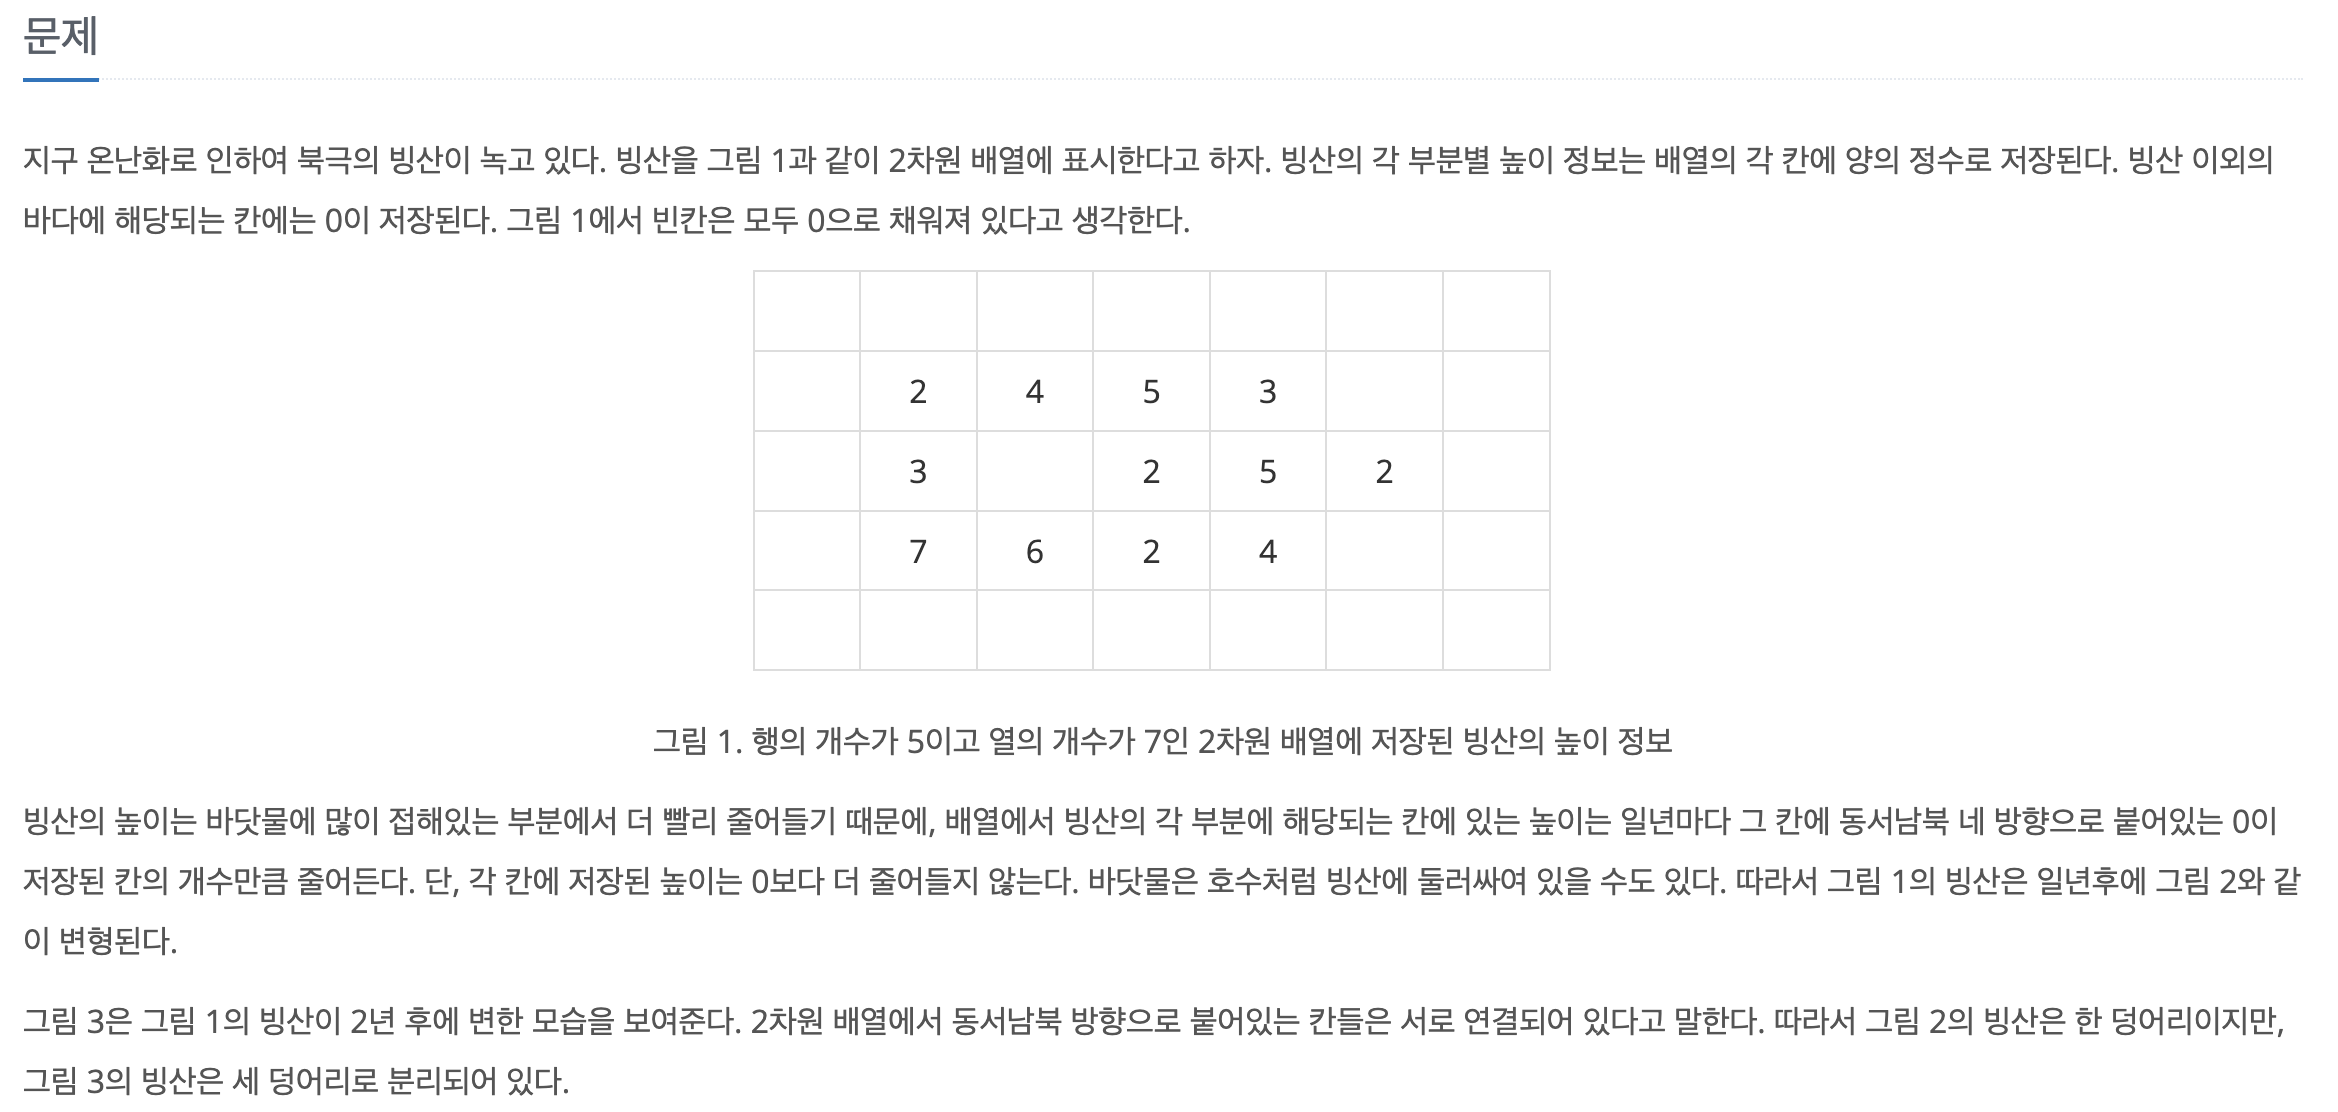

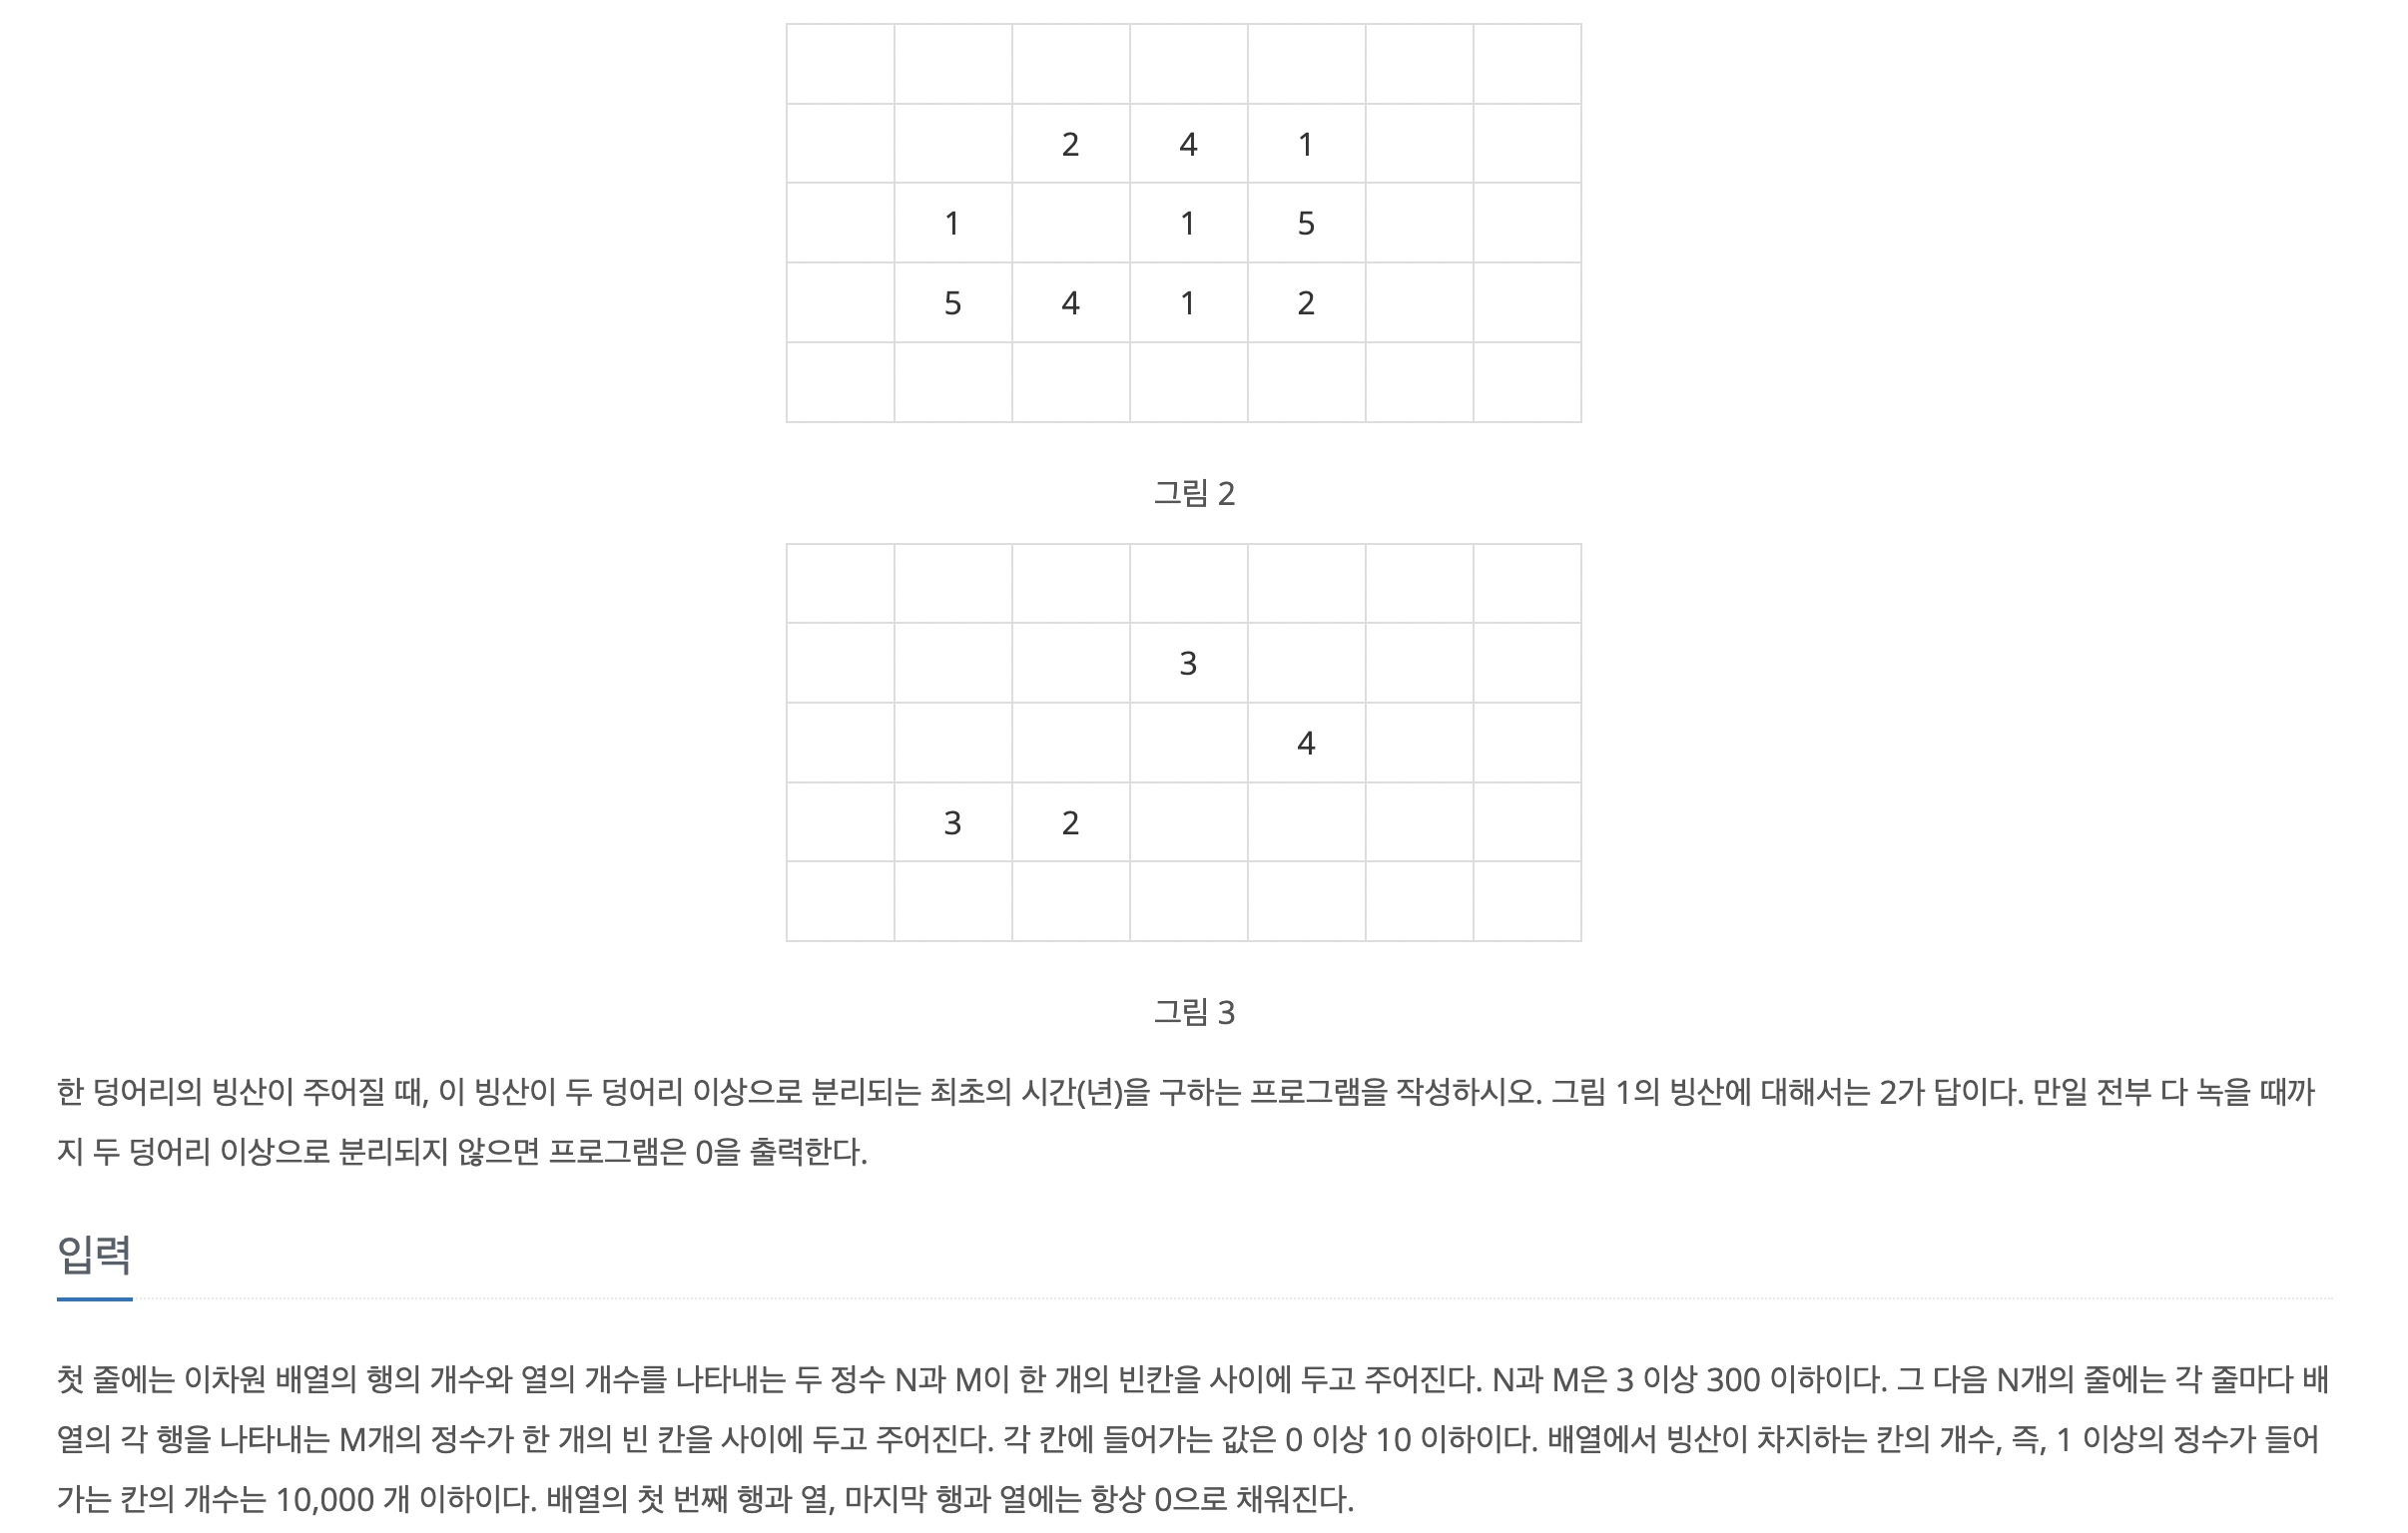

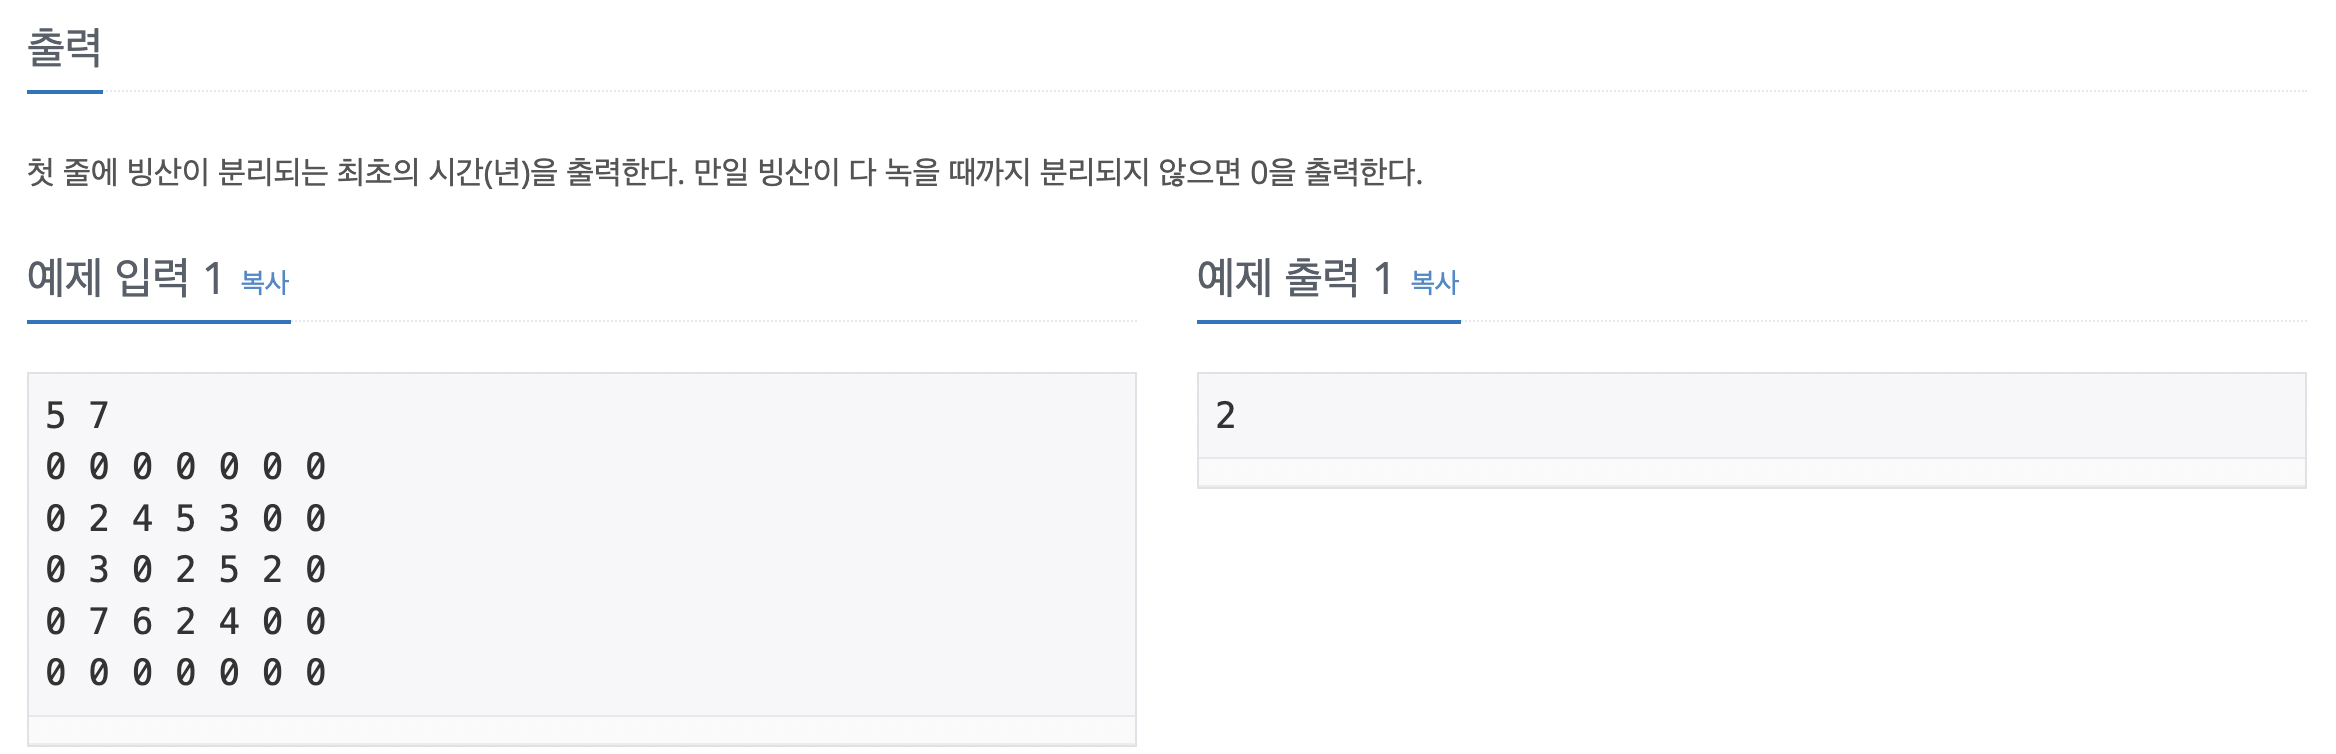

## Step
- 1. 빙산을 녹인다 (bfs 함수 작성 및 구현)
- 2. 1년이 지난후 녹은 빙산이 몇 조각인지 세준다 (dfs 함수 작성 및 구현)
- 3. 만약 녹은 빙산이 2조각이 되지 않는다면, 1번으로 돌아가서 반복

## 제출 코드 (PyPy3)

In [70]:
import sys
sys.setrecursionlimit(10**5)  # 10**6으로 하면 PyPy에서 메모리 초과 발생
from collections import deque

n,m = map(int,input().split())
ice = []
for _ in range(n):
    ice.append(list(map(int,input().split())))
    
dx = [-1,0,1,0]
dy = [0,1,0,-1]

# bfs 함수 정의
# 빙산을 녹이는 bfs 함수
def bfs(ice):
    tmp = [ice[i][:] for i in range(n)]
    while q:
        x,y = q.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            if 0 <= nx < n and 0 <= ny < m:
                if tmp[nx][ny] == 0:
                    if ice[x][y] >= 1:
                        ice[x][y] -= 1
                                 
# dfs 함수 정의
# 빙산이 몇 조각인지 세주는 dfs
def check_dfs(x,y,test):
    if test[x][y] != 0:
        test[x][y] = 0
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            if 0 <= nx < n and 0 <= ny < m:
                if test[nx][ny] != 0:
                    check_dfs(nx,ny,test)
                    
## 프로그램 실행 (빙산이 두 덩어리가 되거나 아예 다 녹을 때 까지)
year = 0
while True:
    
    q = deque()
    for i in range(n):
        for j in range(m):
            if ice[i][j] != 0:
                q.append((i,j))
                
    year += 1
    bfs(ice)
    
    test = [ice[i][:] for i in range(n)]
    cnt = 0
    for i in range(n):
        for j in range(m):
            if test[i][j] != 0:
                cnt += 1
                check_dfs(i,j,test)
    if cnt == 0:
        print(0)
        break
        
    elif cnt >= 2:
        print(year)
        break

5 7
0 0 0 0 0 0 0
0 2 4 5 3 0 0
0 3 0 2 5 2 0
0 7 6 2 4 0 0
0 0 0 0 0 0 0
2
